<a href="https://colab.research.google.com/github/Barragan17/Charaka/blob/master/Colab/BR_goodbooks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pip freeze --local > /content/drive/MyDrive/requirements.txt

Data from https://www.kaggle.com/zygmunt/goodbooks-10k

In [4]:
urlRating = '/content/drive/MyDrive/goodreads10k/ratings.csv'
urlBooks = '/content/drive/MyDrive/goodreads10k/books.csv'
urlTags = '/content/drive/MyDrive/goodreads10k/tags.csv'
urlBookTags = '/content/drive/MyDrive/goodreads10k/book_tags.csv'
urlToRead = '/content/drive/MyDrive/goodreads10k/to_read.csv'

In [5]:
rating = pd.read_csv(urlRating)
rating.sample(5)

,book_id,user_id,rating
408919,4095,37127,4
364438,3649,30713,4
881133,8919,1648,3
124842,1249,29155,2
503756,5052,2498,4


In [6]:
rating.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [7]:
books = pd.read_csv(urlBooks)
books.sample(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7452,7453,4507,4507,1370491,32,553803077,9.780554e+12,Julie Gregory,2003.0,Sickened,Sickened: The Memoir of a Munchausen by Proxy ...,NaN,3.72,11860,13713,1079,271,1109,4097,4942,3294,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8748,8749,10429025,10429025,7790670,9,61990655,9.780062e+12,Jocelyn Davies,2011.0,A Beautiful Dark,"A Beautiful Dark (A Beautiful Dark, #1)",en-US,3.90,16529,16909,1320,557,1238,3819,5086,6209,https://images.gr-assets.com/books/1327916579m...,https://images.gr-assets.com/books/1327916579s...
5583,5584,13345975,13345975,18562276,9,NaN,9.781476e+12,K.A. Linde,2012.0,Avoiding Commitment,"Avoiding Commitment (Avoiding, #1)",eng,3.85,28253,29510,2452,1444,2174,5960,9706,10226,https://images.gr-assets.com/books/1343768792m...,https://images.gr-assets.com/books/1343768792s...
1573,1574,18423,18423,817527,127,441007317,9.780441e+12,"Ursula K. Le Guin, Lech Jęczmyk",1969.0,The Left Hand of Darkness,The Left Hand of Darkness,eng,4.05,61888,72176,4708,1170,3497,13266,26812,27431,https://images.gr-assets.com/books/1488213612m...,https://images.gr-assets.com/books/1488213612s...
6997,6998,38723,17573685,809732,68,393322572,9.780393e+12,"Betty Friedan, Anna Quindlen",1963.0,The Feminine Mystique,The Feminine Mystique,eng,3.85,9823,16455,1137,283,1001,4182,6432,4557,https://images.gr-assets.com/books/1479777578m...,https://images.gr-assets.com/books/1479777578s...


In [8]:
books.drop(['isbn13', 'ratings_count', 'best_book_id', 'work_id', 'book_id'], axis=1)

,id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,272,439023483,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,226,316015849,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,19,441019455,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,19,067973371X,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,60,039330762X,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,7,61711527,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rating, test_size=0.2, random_state=42)

In [16]:
n_users = len(rating.user_id.unique())
n_books = len(rating.book_id.unique())

In [17]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/10
19636/19636 [==============================] - 99s 5ms/step - loss: 1.0703 - val_loss: 0.7309
Epoch 2/10
19636/19636 [==============================] - 97s 5ms/step - loss: 0.6799 - val_loss: 0.7252
Epoch 3/10
19636/19636 [==============================] - 100s 5ms/step - loss: 0.6486 - val_loss: 0.7120
Epoch 4/10
19636/19636 [==============================] - 97s 5ms/step - loss: 0.6215 - val_loss: 0.7100
Epoch 5/10
19636/19636 [==============================] - 96s 5ms/step - loss: 0.6037 - val_loss: 0.7124
Epoch 6/10
19636/19636 [==============================] - 97s 5ms/step - loss: 0.5795 - val_loss: 0.7263
Epoch 7/10
19636/19636 [==============================] - 103s 5ms/step - loss: 0.5558 - val_loss: 0.7247
Epoch 8/10
19636/19636 [==============================] - 100s 5ms/step - loss: 0.5361 - val_loss: 0.7349
Epoch 9/10
19636/19636 [==============================] - 99s 5ms/step - loss: 0.5182 - val_loss: 0.7545
Epoch 10/10
19636/19636 [===========================

Text(0, 0.5, 'Training Error')

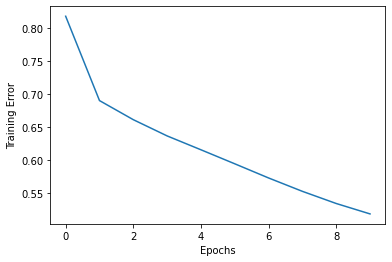

In [18]:
history = model2.fit([train.user_id, train.book_id], train.rating, batch_size=32, epochs=5, verbose=1, validation_split=0.2, use_multiprocessing=True)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Text(0, 0.5, 'Validation Error')

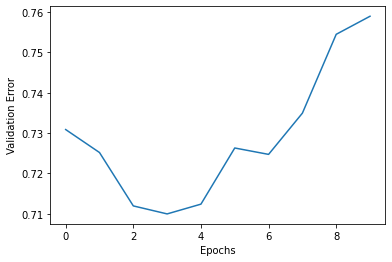

In [21]:
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Validation Error")

In [19]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 11s 2ms/step - loss: 0.7621


0.762060284614563

In [14]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])#input user_id and book_id

In [15]:
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)] #output prediction_score for a certain book with their actual_score

[5.0132976] 5
[3.8527036] 4
[3.6133218] 3
[4.2055807] 5
[3.5592318] 3
[3.6761231] 3
[3.829093] 3
[4.7980976] 4
[4.162579] 3
[4.15185] 5


[None, None, None, None, None, None, None, None, None, None]

In [16]:
book_data = np.array(list(set(rating.book_id)))
book_data #every book_id on rating dataset. 981756 because one book_id can be rated multiple times

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [17]:
user = np.array([100 for i in range(len(book_data))]) #user_id we want to predict
user

array([100, 100, 100, ..., 100, 100, 100])

In [18]:
predictions = model2.predict([user, book_data])

predictions = np.array([a[0] for a in predictions]) #score for every book_id on rating dataset

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8945, 7946, 6589, 6919, 5206])

In [19]:
len(rating.book_id)

981756

In [20]:
predictions

array([4.5221148, 4.412266 , 2.8044248, ..., 4.38539  , 3.8948483,
       4.185023 ], dtype=float32)

In [21]:
predictions[recommended_book_ids]

array([4.957919 , 4.9244995, 4.9104605, 4.9044237, 4.9034395],
      dtype=float32)

In [22]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
5205,5206,13066,13066,2257006,31,446695688,9.780447e+12,Carl Hiaasen,2000.0,Sick Puppy,Sick Puppy,eng,3.88,18248,19594,1069,193,861,5077,8434,5029,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6588,6589,41710,41710,3132229,66,425197387,9.780425e+12,Clive Cussler,1974.0,Iceberg,"Iceberg (Dirk Pitt, #3)",eng,3.83,16195,17357,366,141,863,5131,6881,4341,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6918,6919,55354,55354,893440,22,786887583,9.780787e+12,George Carlin,2001.0,Napalm & Silly Putty,Napalm & Silly Putty,eng,4.12,12798,13437,316,141,465,2561,4724,5546,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7945,7946,39926,39926,836516,43,60512180,9.780061e+12,Naomi Wolf,1990.0,The Beauty Myth: How Images of Beauty Are Used...,The Beauty Myth,eng,3.89,13037,14266,790,234,790,3493,5552,4197,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8944,8945,32529,32529,3214115,40,752848267,9.780753e+12,Lisa Gardner,2001.0,The Next Accident,"The Next Accident (Quincy & Rainie, #3)",en-US,4.16,11261,13328,513,49,231,2323,5612,5113,https://images.gr-assets.com/books/1348816896m...,https://images.gr-assets.com/books/1348816896s...


In [23]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Book-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Book-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      User-Input[0][0]                 
______________________________________________________________________________________________

In [24]:
model2.save('/model')

INFO:tensorflow:Assets written to: /model/assets


INFO:tensorflow:Assets written to: /model/assets


In [26]:
from google.colab import auth

auth.authenticate_user()

!gsutil cp -r /model/* gs://charaka_bookrecommender_model

Copying file:///model/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file:///model/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///model/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file:///model/variables/variables.index [Content-Type=application/octet-stream]...
\ [4 files][  3.9 MiB/  3.9 MiB]                                                
Operation completed over 4 objects/3.9 MiB.                                      
